# **Section 1:**

In [1]:
# Install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Download apache spark
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

In [3]:
#unzip file
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

In [4]:
# Create environment
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [5]:
!pip install -q findspark
import findspark
findspark.init()

In [6]:
from pyspark.sql import SparkSession
spark = (SparkSession.builder.appName("Application").config("spark.some.config.option", "some-value").getOrCreate())

In [7]:
# Download Dataset
!gdown --id 1WbLLhKuUJPGpisBcQNbRccQc6r8FT1TB

Downloading...
From: https://drive.google.com/uc?id=1WbLLhKuUJPGpisBcQNbRccQc6r8FT1TB
To: /content/ipl_dataset_2.zip
100% 3.09M/3.09M [00:00<00:00, 65.8MB/s]


In [8]:
# unzip file
get_ipython().system_raw('unzip ipl_dataset_2.zip')

In [9]:
from pyspark.sql.types import *

### IPL Venue

In [10]:
Cust_schema = StructType()\
.add("venue_id",IntegerType(),True)\
.add("venue",StringType(),True)\
.add("city",StringType(),True)

In [11]:
ipl_venue = spark.read.format("csv").option("header", True).schema(Cust_schema).load("ipl_venue.csv")

In [12]:
ipl_venue.show(3)

+--------+--------------------+-------------+
|venue_id|               venue|         city|
+--------+--------------------+-------------+
|       1|Dr. Y.S. Rajasekh...|Visakhapatnam|
|       2|Sharjah Cricket S...|      Sharjah|
|       3|JSCA Internationa...|       Ranchi|
+--------+--------------------+-------------+
only showing top 3 rows



In [13]:
ipl_venue.printSchema()

root
 |-- venue_id: integer (nullable = true)
 |-- venue: string (nullable = true)
 |-- city: string (nullable = true)



### IPL Matches

In [14]:
Cust_schema = StructType()\
.add("match_id",IntegerType(),True)\
.add("date",DateType(),True)\
.add("player_of_match",StringType(),True)\
.add("venue_id",IntegerType(),True)\
.add("neutral_venue",IntegerType(),True)\
.add("team1",StringType(),True)\
.add("team2",StringType(),True)\
.add("toss_winner",StringType(),True)\
.add("toss_decision",StringType(),True)\
.add("winner",StringType(),True)\
.add("result",StringType(),True)\
.add("result_margin",IntegerType(),True)\
.add("eliminator",StringType(),True)\
.add("method",StringType(),True)\
.add("umpire1",StringType(),True)\
.add("umpire2",StringType(),True)

In [15]:
ipl_matches = spark.read.format("csv").option("header", True).schema(Cust_schema).load("ipl_matches.csv")

In [16]:
ipl_matches.show(1)

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+------+-------------+----------+------+---------+-----------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner|result|result_margin|eliminator|method|  umpire1|    umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+------+-------------+----------+------+---------+-----------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|  runs|          140|         N|    NA|Asad Rauf|RE Koertzen|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+------------------

### IPL ball by ball

In [17]:
Cust_schema = StructType()\
.add("match_id",IntegerType(),True)\
.add("inning",IntegerType(),True)\
.add("over",IntegerType(),True)\
.add("ball",IntegerType(),True)\
.add("batsman",StringType(),True)\
.add("non_striker",StringType(),True)\
.add("bowler",StringType(),True)\
.add("batsman_runs",IntegerType(),True)\
.add("extra_runs",IntegerType(),True)\
.add("total_runs",IntegerType(),True)\
.add("non_boundary",IntegerType(),True)\
.add("is_wicket",IntegerType(),True)\
.add("dismissal_kind",StringType(),True)\
.add("player_dismissed",StringType(),True)\
.add("fielder",StringType(),True)\
.add("extra_type",StringType(),True)\
.add("batting_team",StringType(),True)\
.add("bowling_team",StringType(),True)\

In [18]:
ipl_ball_by_ball = spark.read.format("csv").option("header", True).schema(Cust_schema).load("ipl_ball_by_ball.csv")

In [19]:
ipl_ball_by_ball.show(1)

+--------+------+----+----+-------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+----------+--------------------+--------------+
|match_id|inning|over|ball|batsman|  non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extra_type|        batting_team|  bowling_team|
+--------+------+----+----+-------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+----------+--------------------+--------------+
|  419157|     2|  16|   4|V Kohli|R Vinay Kumar|CRD Fernando|           0|         0|         0|           0|        0|            NA|              NA|     NA|        NA|Royal Challengers...|Mumbai Indians|
+--------+------+----+----+-------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+--------

In [20]:
ipl_ball_by_ball.createOrReplaceTempView("ipl_ball_by_ball")
ipl_matches.createOrReplaceTempView("ipl_matches")
ipl_venue.createOrReplaceTempView("ipl_venue")

In [21]:
spark.catalog.listTables() 

[Table(name='ipl_ball_by_ball', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='ipl_matches', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='ipl_venue', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

# **Section 2:**

## 1. Find the top 3 venues which hosted the most number of eliminator matches?

In [22]:
spark.sql("""SELECT V.venue, COUNT(*) Eliminator_matches_count 
FROM ipl_matches AS M JOIN ipl_venue AS V ON M.venue_id=V.venue_id WHERE M.eliminator='Y'
GROUP BY V.venue ORDER BY Eliminator_matches_count DESC""").show()

+--------------------+------------------------+
|               venue|Eliminator_matches_count|
+--------------------+------------------------+
|Dubai Internation...|                       3|
|Sheikh Zayed Stadium|                       2|
|Sardar Patel Stad...|                       1|
|    Feroz Shah Kotla|                       1|
|M.Chinnaswamy Sta...|                       1|
|            Newlands|                       1|
|Rajiv Gandhi Inte...|                       1|
|    Wankhede Stadium|                       1|
|Saurashtra Cricke...|                       1|
|MA Chidambaram St...|                       1|
+--------------------+------------------------+



## 2. Return most number of catches taken by a player in IPL history?

In [23]:
spark.sql("""SELECT B.fielder, COUNT(*) Total_no_of_catches 
FROM ipl_ball_by_ball B 
WHERE B.dismissal_kind='caught'
GROUP BY B.fielder ORDER BY Total_no_of_catches DESC""").show()

+--------------+-------------------+
|       fielder|Total_no_of_catches|
+--------------+-------------------+
|    KD Karthik|                118|
|      MS Dhoni|                113|
|AB de Villiers|                103|
|      SK Raina|                 99|
|     RG Sharma|                 88|
|    RV Uthappa|                 87|
|    KA Pollard|                 84|
|       V Kohli|                 76|
|      S Dhawan|                 73|
|     MK Pandey|                 70|
|      PA Patel|                 69|
|     DA Warner|                 66|
|       NV Ojha|                 65|
|      DJ Bravo|                 64|
|     RA Jadeja|                 63|
|       WP Saha|                 62|
|     AM Rahane|                 58|
|     AT Rayudu|                 56|
|  F du Plessis|                 54|
|     SV Samson|                 52|
+--------------+-------------------+
only showing top 20 rows



## 3. Write a query to return a report for highest wicket taker in matches which were affected by Duckworth-Lewis’s method (D/L method).

In [24]:
spark.sql("""SELECT CASE B.Fielder WHEN 'NA' THEN B.bowler ELSE B.Fielder END AS wicket_by,
COUNT(*) AS highest_wicket_count
FROM ipl_ball_by_ball AS B JOIN ipl_matches AS M ON B.match_id=M.match_id 
WHERE M.method='D/L' AND B.is_wicket=1
GROUP BY wicket_by 
ORDER BY highest_wicket_count DESC""").show()

+--------------+--------------------+
|     wicket_by|highest_wicket_count|
+--------------+--------------------+
|   NLTC Perera|                   5|
|      MS Dhoni|                   5|
|      S Dhawan|                   4|
|AB de Villiers|                   4|
|    RV Uthappa|                   4|
|       KK Nair|                   3|
|       M Ntini|                   3|
|      AB Dinda|                   3|
|    EJG Morgan|                   3|
|      DW Steyn|                   3|
|       B Kumar|                   3|
|     PP Chawla|                   3|
|      SA Yadav|                   3|
|       RR Pant|                   2|
|    JC Buttler|                   2|
|     K Gowtham|                   2|
|      CH Gayle|                   2|
|   BB McCullum|                   2|
|    JD Unadkat|                   2|
|       NV Ojha|                   2|
+--------------+--------------------+
only showing top 20 rows



## 4. Write a query to return a report for highest strike rate by a batsman in non powerplay overs(7-20 overs) Note: strike rate = (Total Runs scored/Total balls faced by player) *100, Make sure that balls faced by players should be legal delivery (not wide balls or no balls).


In [25]:
spark.sql("""SELECT B.batsman,(SUM(B.total_runs)*100)/COUNT(B.batsman) AS highest_strike_rate 
FROM ipl_ball_by_ball AS B 
WHERE B.over>5 AND B.extra_type NOT IN ('wides','noballs') 
GROUP BY B.batsman
ORDER BY highest_strike_rate DESC""").show()

+---------------+-------------------+
|        batsman|highest_strike_rate|
+---------------+-------------------+
|     ER Dwivedi| 255.55555555555554|
|     B Stanlake|              250.0|
|       Umar Gul| 231.57894736842104|
|   Kamran Akmal|  208.1081081081081|
|       RS Sodhi|              200.0|
|KMDN Kulasekara|              200.0|
|     AD Russell|  184.6813725490196|
|      LJ Wright| 184.31372549019608|
|   Vishnu Vinod|              180.0|
|       V Sehwag|  179.9689440993789|
|         MM Ali| 175.15151515151516|
|     I Malhotra|              175.0|
|   TU Deshpande|              175.0|
|      LPC Silva| 173.68421052631578|
|    Abdul Samad| 172.30769230769232|
|    BCJ Cutting| 171.63120567375887|
|    YV Takawale| 171.11111111111111|
|      KK Cooper| 170.76923076923077|
|       CH Gayle| 170.62031356509885|
|       N Pooran|   170.446735395189|
+---------------+-------------------+
only showing top 20 rows



## 5. Write a query to return a report for highest extra runs in a venue (stadium, city).


In [26]:
spark.sql("""SELECT V.venue, V.city,SUM(B.extra_runs) highest_extra_runs 
FROM ipl_venue V JOIN ipl_matches M JOIN ipl_ball_by_ball B
ON V.venue_id=M.venue_id AND M.match_id=B.match_id 
GROUP BY V.venue,V.city 
ORDER BY highest_extra_runs DESC""").show()

+--------------------+----------+------------------+
|               venue|      city|highest_extra_runs|
+--------------------+----------+------------------+
|M.Chinnaswamy Sta...| Bengaluru|              1355|
|    Wankhede Stadium|    Mumbai|              1232|
|        Eden Gardens|   Kolkata|              1215|
|    Feroz Shah Kotla|     Delhi|              1114|
|MA Chidambaram St...|   Chennai|               905|
|Rajiv Gandhi Inte...| Hyderabad|               900|
|Sawai Mansingh St...|    Jaipur|               791|
|Punjab Cricket As...|Chandigarh|               566|
|Dubai Internation...|     Dubai|               492|
|Sheikh Zayed Stadium| Abu Dhabi|               387|
|Dr DY Patil Sport...|    Mumbai|               320|
|Maharashtra Crick...|      Pune|               315|
|Sharjah Cricket S...|   Sharjah|               287|
|           Kingsmead|    Durban|               277|
|Punjab Cricket As...|Chandigarh|               271|
|   Brabourne Stadium|    Mumbai|             

## 6. Write a query to return a report for the cricketers with the most number of players of the match award in neutral venues

In [27]:
spark.sql("""SELECT M.player_of_match,count(*) total_player_of_match_award from ipl_matches AS M
WHERE M.neutral_venue=1 
GROUP BY M.player_of_match 
ORDER BY total_player_of_match_award DESC""").show()

+----------------+---------------------------+
| player_of_match|total_player_of_match_award|
+----------------+---------------------------+
|       JH Kallis|                          3|
|       JP Duminy|                          3|
|       YK Pathan|                          3|
|      GJ Maxwell|                          3|
|        DR Smith|                          2|
|   KC Sangakkara|                          2|
|       MK Pandey|                          2|
|       RG Sharma|                          2|
|  Sandeep Sharma|                          2|
|DPMD Jayawardene|                          2|
|  M Muralitharan|                          2|
|     LRPL Taylor|                          2|
|        SK Raina|                          2|
|    Yuvraj Singh|                          2|
|       ML Hayden|                          2|
|    SR Tendulkar|                          2|
|    AC Gilchrist|                          2|
|  AB de Villiers|                          2|
|      TM Dil

## 7. Write a query to get a list of top 10 players with the highest batting average Note: Batting average is the total number of runs scored divided by the number of times they have been out (Make sure to include run outs (on non-striker end) as valid out while calculating average).

In [28]:
spark.sql("""SELECT T_runs.batsman,T_runs.total_run/T_outs.Total_outs highest_batting_avg FROM 
(select B.batsman,SUM(B.batsman_runs) total_run
FROM ipl_ball_by_ball B GROUP BY B.batsman) T_runs JOIN
(select C.player_dismissed, COUNT(*) Total_outs
FROM ipl_ball_by_ball C GROUP BY C.player_dismissed) T_outs
ON T_runs.batsman=T_outs.player_dismissed
ORDER BY highest_batting_avg DESC""").show()

+--------------+-------------------+
|       batsman|highest_batting_avg|
+--------------+-------------------+
|    MN van Wyk| 55.666666666666664|
|    RD Gaikwad|               51.0|
|      AC Voges|              45.25|
|      KL Rahul|  44.86440677966102|
|       HM Amla|  44.38461538461539|
| Iqbal Abdulla|               44.0|
|     DA Warner|  42.71544715447155|
|   JM Bairstow| 41.578947368421055|
|      CH Gayle|  41.13793103448276|
|      MS Dhoni| 40.991150442477874|
|PD Collingwood|               40.6|
|AB de Villiers|  40.40833333333333|
|   LMP Simmons|  39.96296296296296|
|      SE Marsh|  39.95161290322581|
|     JP Duminy|  39.78431372549019|
| KS Williamson|  39.48780487804878|
|    MEK Hussey|  38.76470588235294|
|       V Kohli|  38.16883116883117|
|     ML Hayden|               36.9|
|     A Symonds| 36.074074074074076|
+--------------+-------------------+
only showing top 20 rows



## 8. Write a query to find out who has officiated (as an umpire) the most number of matches in IPL

In [29]:
spark.sql("""SELECT matches.umpire,COUNT(*) No_of_matches FROM 
((SELECT A.umpire1 as umpire from ipl_matches A) UNION ALL (SELECT B.umpire2 as umpire from ipl_matches B)) matches
GROUP BY matches.umpire
ORDER BY No_of_matches DESC""").show()

+--------------------+-------------+
|              umpire|No_of_matches|
+--------------------+-------------+
|              S Ravi|          121|
|     HDPK Dharmasena|           94|
|        AK Chaudhary|           87|
|       C Shamshuddin|           82|
|           M Erasmus|           65|
|         Nitin Menon|           57|
|           CK Nandan|           57|
|          SJA Taufel|           55|
|           Asad Rauf|           51|
|         VA Kulkarni|           50|
|        BNJ Oxenford|           48|
|         CB Gaffaney|           47|
|           RJ Tucker|           46|
|         BR Doctrove|           42|
|         RE Koertzen|           41|
|           Aleem Dar|           38|
|            NJ Llong|           37|
|           BF Bowden|           37|
|KN Ananthapadmana...|           33|
|      RK Illingworth|           31|
+--------------------+-------------+
only showing top 20 rows



## 9. Find venue details of the match where V Kohli scored his highest individual runs in IPL

In [30]:
spark.sql("""SELECT M.match_id,V.venue,V.city,B.batsman,sum(B.batsman_runs) total_runs 
FROM ipl_ball_by_ball AS B JOIN ipl_matches M on B.match_id=M.match_id JOIN ipl_venue V on M.venue_id =V.venue_id
WHERE B.batsman= 'V Kohli'
GROUP BY M.match_id,V.venue,V.city,B.batsman
ORDER BY total_runs DESC LIMIT 1""").show()

+--------+--------------------+---------+-------+----------+
|match_id|               venue|     city|batsman|total_runs|
+--------+--------------------+---------+-------+----------+
|  980999|M.Chinnaswamy Sta...|Bengaluru|V Kohli|       113|
+--------+--------------------+---------+-------+----------+



## 10. Creative Case study: Please analyze how winning/losing tosses can impact a match and it's result?

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sql_query = spark.sql('select * from ipl_matches')
matches = sql_query.toPandas()

In [32]:
matches['t_winner_m_winner']=np.where(matches['toss_winner']==matches['winner'], 1 ,0)

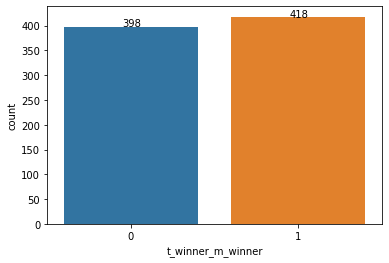

In [33]:
ax=sns.countplot(x='t_winner_m_winner',data=matches)
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.02))
plt.show()

The chances of winning a match on winning the toss is 51 percent and chance of losing a match on winning the toss is 49 percent. Both the chances are equally probable.

### RCB winning the toss

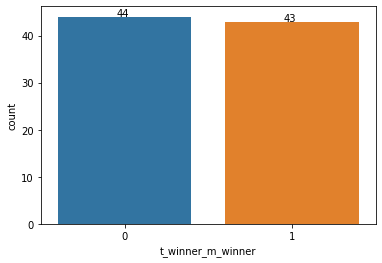

In [34]:
RCB_matches=matches[(matches['team1']=='Royal Challengers Bangalore') | (matches['team2']=='Royal Challengers Bangalore')]
RCB_matches=RCB_matches[RCB_matches['toss_winner']=='Royal Challengers Bangalore']
RCB_matches['t_winner_m_winner']=np.where(RCB_matches['winner']=='Royal Challengers Bangalore', 1 ,0)
ax=sns.countplot(x='t_winner_m_winner',data=RCB_matches)
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.02))
plt.show()

### RCB losing the toss

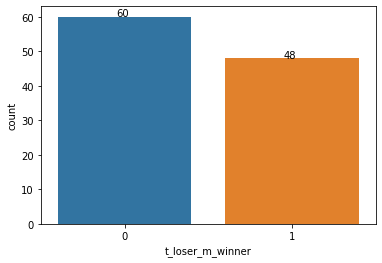

In [35]:
RCB_matches=matches[(matches['team1']=='Royal Challengers Bangalore') | (matches['team2']=='Royal Challengers Bangalore')]
RCB_matches=RCB_matches[RCB_matches['toss_winner']!='Royal Challengers Bangalore']
RCB_matches['t_loser_m_winner']=np.where(RCB_matches['winner']=='Royal Challengers Bangalore', 1 ,0)
ax=sns.countplot(x='t_loser_m_winner',data=RCB_matches)
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.02))
plt.show()

In case RCB wins the toss the chance of winning the game and losing the game is equally proportional and in case RCB losses the toss than the chances of losing the game is more than winning the game.

### MI winning the toss

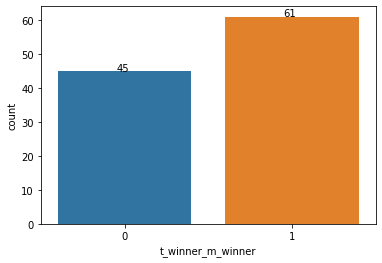

In [36]:
MI_matches=matches[(matches['team1']=='Mumbai Indians') | (matches['team2']=='Mumbai Indians')]
MI_matches=MI_matches[MI_matches['toss_winner']=='Mumbai Indians']
MI_matches['t_winner_m_winner']=np.where(MI_matches['winner']=='Mumbai Indians', 1 ,0)
ax=sns.countplot(x='t_winner_m_winner',data=MI_matches)
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.02))
plt.show()

### MI losing the toss

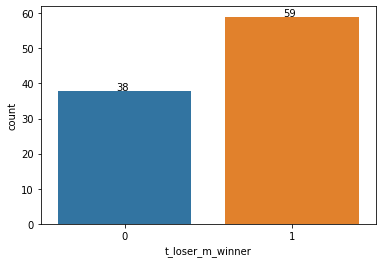

In [37]:
MI_matches=matches[(matches['team1']=='Mumbai Indians') | (matches['team2']=='Mumbai Indians')]
MI_matches=MI_matches[MI_matches['toss_winner']!='Mumbai Indians']
MI_matches['t_loser_m_winner']=np.where(MI_matches['winner']=='Mumbai Indians', 1 ,0)
ax=sns.countplot(x='t_loser_m_winner',data=MI_matches)
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.02))
plt.show()

In both the case of winning the toss or losing the toss, the chance of winning the game is more for MI

### CSK winning the toss

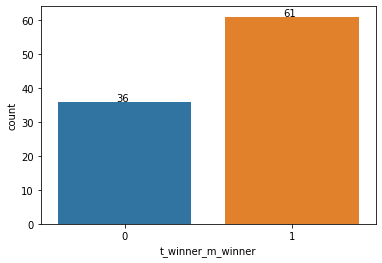

In [38]:
CSK_matches=matches[(matches['team1']=='Chennai Super Kings') | (matches['team2']=='Chennai Super Kings')]
CSK_matches=CSK_matches[CSK_matches['toss_winner']=='Chennai Super Kings']
CSK_matches['t_winner_m_winner']=np.where(CSK_matches['winner']=='Chennai Super Kings', 1 ,0)
ax=sns.countplot(x='t_winner_m_winner',data=CSK_matches)
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.02))
plt.show()

### CSK losing the toss

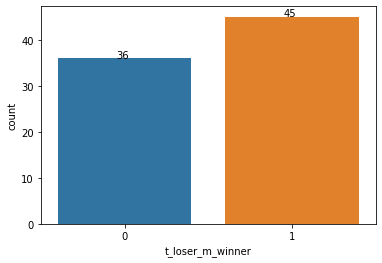

In [39]:
CSK_matches=matches[(matches['team1']=='Chennai Super Kings') | (matches['team2']=='Chennai Super Kings')]
CSK_matches=CSK_matches[CSK_matches['toss_winner']!='Chennai Super Kings']
CSK_matches['t_loser_m_winner']=np.where(CSK_matches['winner']=='Chennai Super Kings', 1 ,0)
ax=sns.countplot(x='t_loser_m_winner',data=CSK_matches)
for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.02))
plt.show()

In both the case of winning the toss or losing the toss, the chance of winning the game is more for CSK

**Thus we can concluse that winning or losing the toss is not really having any impact on the winning or losing the game.**

# Section 3:

In [40]:
import sqlite3
  
# Connect to SQLite database
conn = sqlite3.connect('IPL.db')

#Read datasets
ipl_matches=pd.read_csv('ipl_matches.csv')
ipl_ball_by_ball=pd.read_csv('ipl_ball_by_ball.csv')
ipl_venue=pd.read_csv('ipl_venue.csv')

# Write the data to a sqlite table
ipl_matches.to_sql('ipl_matches', conn, if_exists='replace', index=False)
ipl_ball_by_ball.to_sql('ipl_ball_by_ball', conn, if_exists='replace', index=False)
ipl_venue.to_sql('ipl_venue', conn, if_exists='replace', index=False)

In [41]:
tables = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type='table'",conn)
tables = tables["Table_Name"].values.tolist()

In [42]:
print(tables)

['ipl_matches', 'ipl_ball_by_ball', 'ipl_venue']


In [43]:
class Database():
  
  def __init__(self):
    self.conn = sqlite3.connect('IPL.db')

  def get_query1_result(self):
    query="""SELECT V.venue, COUNT(*) Eliminator_matches_count 
      FROM ipl_matches AS M JOIN ipl_venue AS V ON M.venue_id=V.venue_id WHERE M.eliminator='Y'
      GROUP BY V.venue ORDER BY Eliminator_matches_count DESC"""

    query = pd.read_sql_query(query,self.conn)
    query = query.to_dict('index')

    return query 

  def get_query2_result(self):
    query="""SELECT B.fielder, Count(*) Total_no_of_catches FROM ipl_ball_by_ball B WHERE B.dismissal_kind='caught'
      GROUP BY B.fielder ORDER BY Total_no_of_catches DESC"""

    query = pd.read_sql_query(query,self.conn)
    query = query.to_dict('index')

    return query
  
  def get_query3_result(self):
    query="""SELECT CASE WHEN B.Fielder is Null THEN B.bowler ELSE B.Fielder END AS wicket_by,
      COUNT(*) AS highest_wicket_count
      FROM ipl_ball_by_ball AS B JOIN ipl_matches AS M ON B.match_id=M.match_id 
      WHERE M.method='D/L' AND B.is_wicket=1
      GROUP BY wicket_by 
      ORDER BY highest_wicket_count DESC"""

    query = pd.read_sql_query(query,self.conn)
    query = query.to_dict('index')

    return query
  
  def get_query4_result(self):
    query="""SELECT B.batsman,SUM(B.total_runs)*1.0/COUNT(B.batsman)*100 AS highest_strike_rate 
      FROM ipl_ball_by_ball AS B 
      WHERE B.overs>5 AND (B.extras_type is NULL OR B.extras_type is 'legbyes' OR B.extras_type is 'byes')
      GROUP BY B.batsman
      ORDER BY highest_strike_rate DESC"""

    query = pd.read_sql_query(query,self.conn)
    query = query.to_dict('index')

    return query

  def get_query5_result(self):
    query="""SELECT V.venue, V.city,SUM(B.extra_runs) highest_extra_runs 
      FROM ipl_venue V JOIN ipl_matches M JOIN ipl_ball_by_ball B
      ON V.venue_id=M.venue_id AND M.match_id=B.match_id 
      GROUP BY V.venue,V.city 
      ORDER BY highest_extra_runs DESC"""

    query = pd.read_sql_query(query,self.conn)
    query = query.to_dict('index')

    return query

  def get_query6_result(self):
    query="""SELECT M.player_of_match,count(*) total_player_of_match_award 
      FROM ipl_matches AS M
      WHERE M.neutral_venue=1 
      GROUP BY M.player_of_match 
      ORDER BY total_player_of_match_award DESC"""

    query = pd.read_sql_query(query,self.conn)
    query = query.to_dict('index')

    return query

  def get_query7_result(self):
    query="""SELECT T_runs.batsman,T_runs.total_run*1.0/T_outs.Total_outs highest_batting_avg FROM 
      (select B.batsman,SUM(B.batsman_runs) total_run
      FROM ipl_ball_by_ball B GROUP BY B.batsman) T_runs JOIN
      (select C.player_dismissed, COUNT(*) Total_outs
      FROM ipl_ball_by_ball C GROUP BY C.player_dismissed) T_outs
      ON T_runs.batsman=T_outs.player_dismissed
      ORDER BY highest_batting_avg DESC"""

    query = pd.read_sql_query(query,self.conn)
    query = query.to_dict('index')

    return query

  def get_query8_result(self):
    query="""SELECT matches.umpire,COUNT(*) No_of_matches 
      FROM (SELECT A.umpire1 as umpire from ipl_matches A UNION ALL SELECT B.umpire2 as umpire from ipl_matches B) matches
      GROUP BY matches.umpire
      ORDER BY No_of_matches DESC"""

    query = pd.read_sql_query(query,self.conn)
    query = query.to_dict('index')

    return query

  def get_query9_result(self):
    query="""SELECT M.match_id,V.venue,V.city,B.batsman,sum(B.batsman_runs) total_runs 
    FROM ipl_ball_by_ball AS B JOIN ipl_matches M on B.match_id=M.match_id JOIN ipl_venue V on M.venue_id =V.venue_id
    WHERE B.batsman= 'V Kohli'
    GROUP BY M.match_id,V.venue,V.city,B.batsman
    ORDER BY total_runs DESC LIMIT 1"""

    query = pd.read_sql_query(query,self.conn)
    query = query.to_dict('index')

    return query
  
  def get_status(self):
    try:
        self.conn.cursor()
        return print('Database is conncected')
    except Exception as ex:
        return print('Database is not conncected')
  
  def close(self):
    self.conn.close()

In [44]:
db=Database()

In [45]:
db.get_query9_result()

{0: {'batsman': 'V Kohli',
  'city': 'Bengaluru',
  'match_id': 980999,
  'total_runs': 113,
  'venue': 'M.Chinnaswamy Stadium'}}

In [46]:
db.get_status()

Database is conncected


In [47]:
db.close()

In [48]:
db.get_status()

Database is not conncected
